# Matplotlib: Adding Shapes

In [1]:
from matplotlib import pyplot as plt

import numpy as np

In [2]:
np.random.seed(33)
X = np.random.normal(0, 3, size=50)
Y = X + np.random.normal(0, 3, size=50)

## Rectangle



In [3]:
from matplotlib.patches import Rectangle

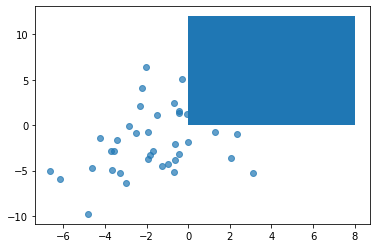

In [4]:
plt.scatter(X, Y, alpha=0.7)

rect = Rectangle((0, 0), 8, 12)
plt.gca().add_patch(rect);

### `fill`

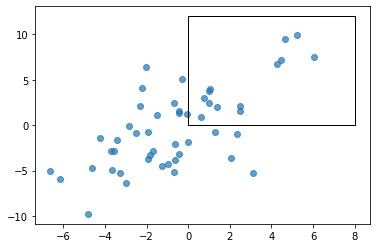

In [5]:
plt.scatter(X, Y, alpha=0.7)

rect = Rectangle((0, 0), 8, 12, fill=False) 
plt.gca().add_patch(rect);

### `angle`

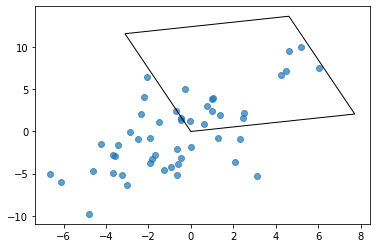

In [6]:
plt.scatter(X, Y, alpha=0.7)

rect = Rectangle((0, 0), 8, 12, fill=False, angle=15) 
plt.gca().add_patch(rect);

## Circle

In [7]:
from matplotlib.patches import Circle

In [8]:
plt.rcParams['figure.figsize'] = (6, 6)

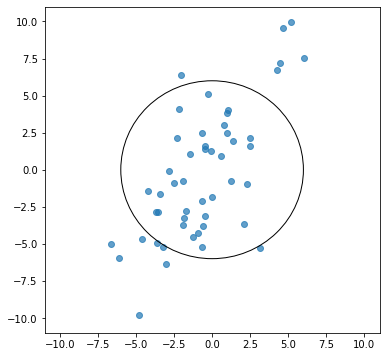

In [9]:
plt.scatter(X, Y, alpha=0.7)
plt.xlim(-11, 11)
plt.ylim(-11, 11)

circle = Circle((0,0), 6, fill=False)
plt.gca().add_patch(circle);

## Applications



#### Absolute Value Example

In [10]:
line_x = np.linspace(0, 10, 1001)
line_y = 5 - 2*np.abs(line_x - 5)

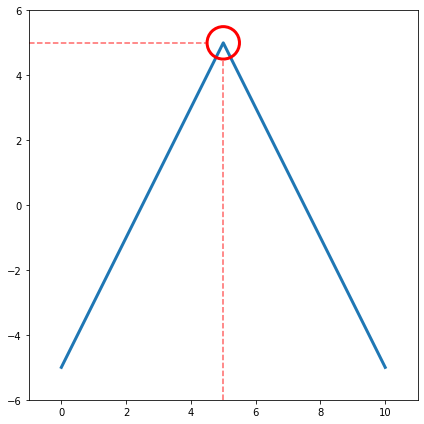

In [11]:
plt.plot(line_x, line_y, lw=3)
plt.gca().margins(0.1)

plt.axvline(5, ymax=0.87, ls='--', color='red', alpha=0.6)
plt.axhline(5, xmax=0.46, ls='--', color='red', alpha=0.6)

cir = Circle((5, 5), 0.5, color='red', lw=3, fill=False, zorder=10)
plt.gca().add_patch(cir)

plt.tight_layout()

#plt.savefig('06shapes_abs_application.png', dpi=200)

#### Cereal Example

In [12]:
import pandas as pd

In [13]:
url = 'https://bit.ly/2JRmGC2'        #Pull in cereal data from GitHub repo

df = pd.read_csv(url, na_values=-1)   #Null values in this dataset are denoted -1

df['sugars_per_cup'] = df.sugars/df.cups
df['fat_per_cup'] = df.fat/df.cups

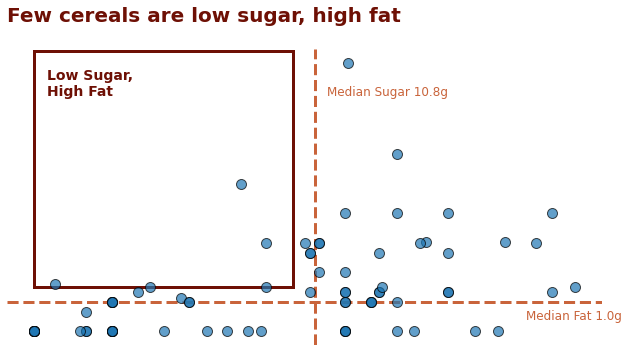

In [14]:
plt.figure(figsize=(9, 5))

plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=2, edgecolor='black')

plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=1, color='xkcd:terra cotta')
plt.axvline(df['sugars_per_cup'].median(), linestyle='--', lw=3, 
            zorder=1, color='xkcd:terra cotta')

plt.title('Few cereals are low sugar, high fat\n', 
          fontsize=20,
          color='xkcd:reddy brown',
          fontweight='bold',
          loc='left'
         )

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
  
plt.annotate(f'Median Fat {df.fat_per_cup.median():.1f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            );
plt.annotate(f'Median Sugar {df.sugars_per_cup.median():.1f}g', 
             (df.sugars_per_cup.median()+0.5, 8), 
             fontsize=12,
             color='xkcd:terra cotta'
            )

#Add rectangle
plt.gca().add_patch(Rectangle((0, 1.5), 10, 8,
                     color='xkcd:reddy brown', lw=3, fill=None))

#Annotate rectangular region
plt.annotate(f'Low Sugar,\nHigh Fat', 
             (0.5, 8), 
             fontsize=14,
             fontweight='bold',
             color='xkcd:reddy brown'
            )

plt.tight_layout()
#plt.savefig('06shapes_cereal_application.png', dpi=200);

#### THE DOLPHIN!

Code copied from `matplotlib` [library example](https://matplotlib.org/3.1.1/gallery/shapes_and_collections/dolphin.html#sphx-glr-gallery-shapes-and-collections-dolphin-py).

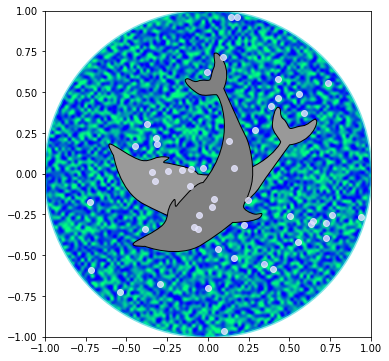

In [15]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.path import Path
from matplotlib.transforms import Affine2D
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


r = np.random.rand(50)
t = np.random.rand(50) * np.pi * 2.0
x = r * np.cos(t)
y = r * np.sin(t)

fig, ax = plt.subplots(figsize=(6, 6))
circle = Circle((0, 0), 1, facecolor='none',
                edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)

im = plt.imshow(np.random.random((100, 100)),
                origin='lower', cmap=cm.winter,
                interpolation='spline36',
                extent=([-1, 1, -1, 1]))
im.set_clip_path(circle)

plt.plot(x, y, 'o', color=(0.9, 0.9, 1.0), alpha=0.8)

# Dolphin from OpenClipart library by Andy Fitzsimon
#       <cc:License rdf:about="http://web.resource.org/cc/PublicDomain">
#         <cc:permits rdf:resource="http://web.resource.org/cc/Reproduction"/>
#         <cc:permits rdf:resource="http://web.resource.org/cc/Distribution"/>
#         <cc:permits rdf:resource="http://web.resource.org/cc/DerivativeWorks"/>
#       </cc:License>

dolphin = """
M -0.59739425,160.18173 C -0.62740401,160.18885 -0.57867129,160.11183
-0.57867129,160.11183 C -0.57867129,160.11183 -0.5438361,159.89315
-0.39514638,159.81496 C -0.24645668,159.73678 -0.18316813,159.71981
-0.18316813,159.71981 C -0.18316813,159.71981 -0.10322971,159.58124
-0.057804323,159.58725 C -0.029723983,159.58913 -0.061841603,159.60356
-0.071265813,159.62815 C -0.080250183,159.65325 -0.082918513,159.70554
-0.061841203,159.71248 C -0.040763903,159.7194 -0.0066711426,159.71091
0.077336307,159.73612 C 0.16879567,159.76377 0.28380306,159.86448
0.31516668,159.91533 C 0.3465303,159.96618 0.5011127,160.1771
0.5011127,160.1771 C 0.63668998,160.19238 0.67763022,160.31259
0.66556395,160.32668 C 0.65339985,160.34212 0.66350443,160.33642
0.64907098,160.33088 C 0.63463742,160.32533 0.61309688,160.297
0.5789627,160.29339 C 0.54348657,160.28968 0.52329693,160.27674
0.50728856,160.27737 C 0.49060916,160.27795 0.48965803,160.31565
0.46114204,160.33673 C 0.43329696,160.35786 0.4570711,160.39871
0.43309565,160.40685 C 0.4105108,160.41442 0.39416631,160.33027
0.3954995,160.2935 C 0.39683269,160.25672 0.43807996,160.21522
0.44567915,160.19734 C 0.45327833,160.17946 0.27946869,159.9424
-0.061852613,159.99845 C -0.083965233,160.0427 -0.26176109,160.06683
-0.26176109,160.06683 C -0.30127962,160.07028 -0.21167141,160.09731
-0.24649368,160.1011 C -0.32642366,160.11569 -0.34521187,160.06895
-0.40622293,160.0819 C -0.467234,160.09485 -0.56738444,160.17461
-0.59739425,160.18173
"""

vertices = []
codes = []
parts = dolphin.split()
i = 0
code_map = {
    'M': (Path.MOVETO, 1),
    'C': (Path.CURVE4, 3),
    'L': (Path.LINETO, 1)}

while i < len(parts):
    code = parts[i]
    path_code, npoints = code_map[code]
    codes.extend([path_code] * npoints)
    vertices.extend([[float(x) for x in y.split(',')] for y in
                     parts[i + 1:i + npoints + 1]])
    i += npoints + 1
vertices = np.array(vertices, float)
vertices[:, 1] -= 160

dolphin_path = Path(vertices, codes)
dolphin_patch = PathPatch(dolphin_path, facecolor=(0.6, 0.6, 0.6),
                          edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch)

vertices = Affine2D().rotate_deg(60).transform(vertices)
dolphin_path2 = Path(vertices, codes)
dolphin_patch2 = PathPatch(dolphin_path2, facecolor=(0.5, 0.5, 0.5),
                           edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch2);

#plt.savefig('06shapes_dolphin_application.png', dpi=200);

#### Intro Shapes Example

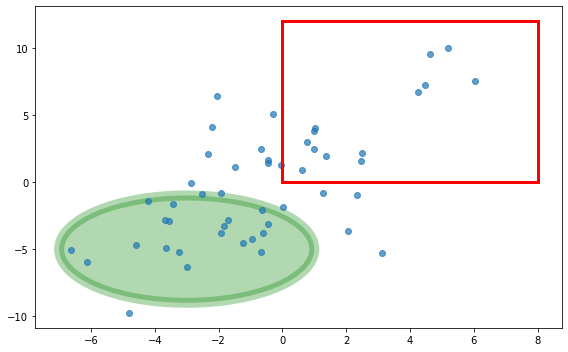

In [16]:
plt.figure(figsize=(8, 5))

plt.scatter(X, Y, alpha=0.7, zorder=2)

ax = plt.gca()

rect = Rectangle((0, 0), 8, 12, fill=False, lw=3, color='red', zorder=3) 
ax.add_patch(rect)

circle = Circle((-3, -5), 4, alpha=0.3, color='green', lw=10, zorder=1)
ax.add_patch(circle)

plt.tight_layout()
#plt.savefig('06shapes_shapes_example.png', dpi=200);

#### Thumbnail

In [17]:
import seaborn as sns

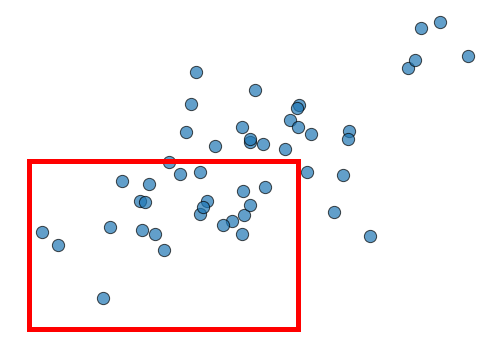

In [18]:
plt.figure(figsize=(7, 5))

plt.scatter(X, Y, alpha=0.7, zorder=2, s=150, edgecolor='black')

ax = plt.gca()

rect = Rectangle((-7, -12), 8, 12, fill=False, lw=5, color='red', zorder=3) 
ax.add_patch(rect)

sns.despine(left=True, bottom=True)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
#plt.savefig('06shapes_image_thumbnail.png', dpi=200);

## Ellipse

In [19]:
from matplotlib.patches import Ellipse

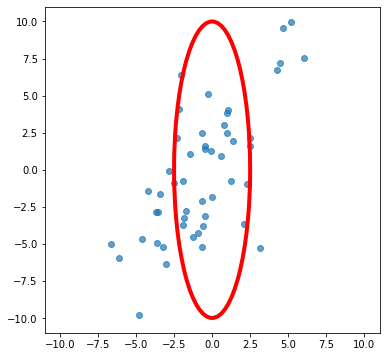

In [20]:
plt.scatter(X, Y, alpha=0.7)
plt.xlim(-11, 11)
plt.ylim(-11, 11)

ellipse = Ellipse((0,0), 5, 20, fill=False, lw=4, color='red')
plt.gca().add_patch(ellipse);

## Regular Polygon

In [21]:
from matplotlib.patches import RegularPolygon

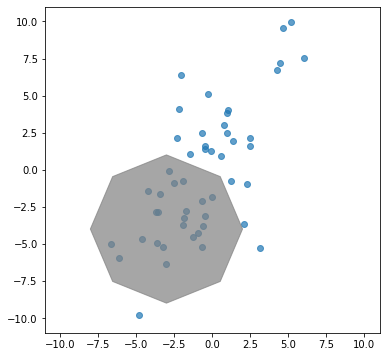

In [22]:
plt.scatter(X, Y, alpha=0.7)
plt.xlim(-11, 11)
plt.ylim(-11, 11)

poly = RegularPolygon((-3, -4), 8, alpha=0.7, color='gray')  
plt.gca().add_patch(poly);